In [1]:
import pandas as pd
df = pd.read_csv('./dataset/clustering.csv')
df.head()

,Recruit,Custom,Shirt,Accessory
0,0,57600,7470,1039
1,4780,69700,5720,0
2,0,44000,0,331
3,8180,43200,5910,775
4,46980,0,3270,499


In [2]:
df.describe()

,Recruit,Custom,Shirt,Accessory
count,100.000000,100.000000,100.00000,100.000000
mean,23931.200000,30164.000000,3229.90000,407.480000
std,20366.635485,23503.623275,2741.82034,496.458559
min,0.000000,0.000000,0.00000,0.000000
25%,0.000000,13300.000000,0.00000,0.000000
50%,27880.000000,27550.000000,3350.00000,249.000000
75%,39955.000000,46150.000000,4860.00000,628.250000
max,65180.000000,83700.000000,10750.00000,2463.000000


In [3]:
df.corr()

,Recruit,Custom,Shirt,Accessory
Recruit,1.000000,-0.554173,-0.405148,-0.283262
Custom,-0.554173,1.000000,0.371186,0.191235
Shirt,-0.405148,0.371186,1.000000,0.130626
Accessory,-0.283262,0.191235,0.130626,1.000000


In [4]:
# クラスタリングする
from sklearn.cluster import k_means

n_clusters = 2
centroid, label, inertia = k_means(df, n_clusters, random_state=0)
centroid, label, inertia

(array([[  3878.18181818,  48025.        ,   4523.18181818,    611.47727273],
        [ 39687.14285714,  16130.35714286,   2213.75      ,    247.19642857]]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0], dtype=int32),
 39727838655.12175)

In [5]:
# ラベル0を取り出す
df0 = df[label == 0]
df0_mean = df0.mean()
df0_mean

Recruit       3878.181818
Custom       48025.000000
Shirt         4523.181818
Accessory      611.477273
dtype: float64

In [6]:
# ラベル1を取り出す
df1 = df[label == 1]
df1_mean = df1.mean()
df1_mean

Recruit      39687.142857
Custom       16130.357143
Shirt         2213.750000
Accessory      247.196429
dtype: float64

### k-means法

- n_clustersにクラスター数を指定する

```
from sklearn.cluster import KMeans
km = KMeans(n_clusters, random_state=0) 
km.fit(df) 
km.predict(df) 
```

#### プロットする

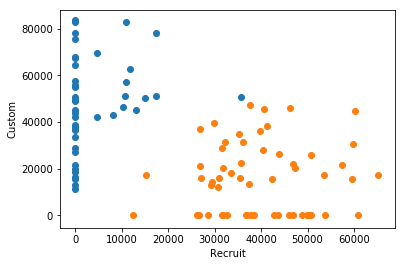

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# RecruitとCustomの散布図
plt.scatter(df0.Recruit, df0.Custom)
plt.scatter(df1.Recruit, df1.Custom)
plt.xlabel('Recruit')
plt.ylabel('Custom');

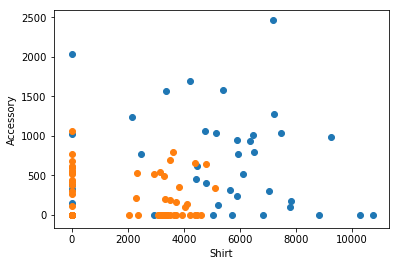

In [8]:
# ShirtとAccessorの散布図
plt.scatter(df0.Shirt, df0.Accessory)
plt.scatter(df1.Shirt, df1.Accessory)
plt.xlabel('Shirt')
plt.ylabel('Accessory');

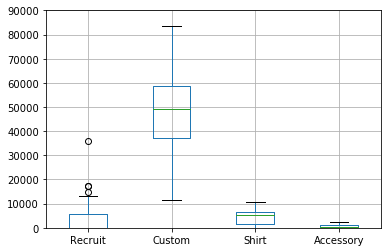

In [9]:
# ラベル0の箱ひげ図
plt.ylim(0, 90000)
df0.boxplot();

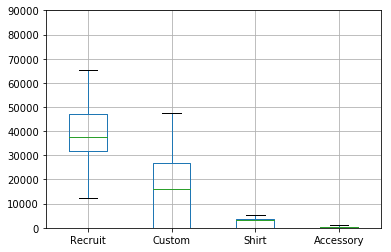

In [10]:
# ラベル1の箱ひげ図
plt.ylim(0, 90000)
df1.boxplot();